In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv(r"C:\Users\mota1\Documents\machine lerning projects\reto-hackthon-JOBMadrid22\train.csv", delimiter = ",")

In [5]:
df = pd.DataFrame(dataset)
df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [6]:
dataset.dtypes

order_id            int64
local_time         object
country_code       object
store_address       int64
payment_status     object
n_of_products       int64
products_total    float64
final_status       object
dtype: object

In [7]:
df.isnull().sum()

order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
final_status      0
dtype: int64

In [8]:
dataset.describe()

,order_id,store_address,n_of_products,products_total
count,5.433000e+04,54330.000000,54330.000000,54330.000000
mean,3.278267e+07,41609.384981,2.815792,9.838136
std,4.459402e+05,21903.267141,2.430936,9.260352
min,3.150378e+07,190.000000,1.000000,0.000000
25%,3.240007e+07,21369.000000,1.000000,4.130000
50%,3.278159e+07,45993.500000,2.000000,7.130000
75%,3.318380e+07,62004.000000,3.000000,12.770000
max,3.356085e+07,75236.000000,39.000000,221.480000


<h3>1.¿Cuáles son los 3 paises en los que más pedidos se realizan?</h3>

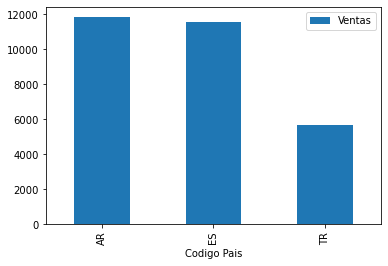

In [9]:
df.groupby(['country_code']).agg({'order_id':'count'}).sort_values(['order_id'],ascending=False).head(3).plot(kind = 'bar',xlabel='Codigo Pais')
plt.legend(['Ventas'])


<h3>----------------------------------------------------------------------------------------------------------------------</h3>

In [10]:
df[df.country_code == 'ES']

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
8,32236610,17:09:16,ES,30120,PAID,3,4.35,DeliveredStatus
13,32235607,18:02:18,ES,18682,PAID,9,16.12,DeliveredStatus
19,32670668,14:37:58,ES,8994,PAID,12,17.93,DeliveredStatus
24,32126718,21:12:30,ES,14872,PAID,3,22.00,DeliveredStatus
...,...,...,...,...,...,...,...,...
54289,32549621,15:07:11,ES,16238,PAID,4,8.00,DeliveredStatus
54301,32226645,15:53:29,ES,28671,PAID,2,7.35,DeliveredStatus
54304,32713532,20:43:08,ES,67438,PAID,3,35.80,CanceledStatus
54320,32273919,20:52:39,ES,27585,PAID,2,17.20,DeliveredStatus


In [11]:
#df.groupby(pd.Grouper(key='local_time', freq='60min')).sum()
#x = df['local_time']
#x = pd.to_datetime(df['local_time']).strftime("%Y/%m/%d")
#df['new_time'] = pd.to_timedelta(df['local_time'])
df['new_time'] = pd.to_datetime(df['local_time'], format='%H:%M:%S' )
df.dtypes
#dfc['Time_of_Sail'] = pd.to_timedelta(dfc['Time_of_Sail'], unit='s')
#dfc['Time_of_Sail'] = pd.to_datetime(dfc['Time_of_Sail'], format='%H:%M:%S' ).apply(pd.Timestamp)

order_id                   int64
local_time                object
country_code              object
store_address              int64
payment_status            object
n_of_products              int64
products_total           float64
final_status              object
new_time          datetime64[ns]
dtype: object

In [12]:
df[df.country_code == 'ES']

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,new_time
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,1900-01-01 20:15:21
8,32236610,17:09:16,ES,30120,PAID,3,4.35,DeliveredStatus,1900-01-01 17:09:16
13,32235607,18:02:18,ES,18682,PAID,9,16.12,DeliveredStatus,1900-01-01 18:02:18
19,32670668,14:37:58,ES,8994,PAID,12,17.93,DeliveredStatus,1900-01-01 14:37:58
24,32126718,21:12:30,ES,14872,PAID,3,22.00,DeliveredStatus,1900-01-01 21:12:30
...,...,...,...,...,...,...,...,...,...
54289,32549621,15:07:11,ES,16238,PAID,4,8.00,DeliveredStatus,1900-01-01 15:07:11
54301,32226645,15:53:29,ES,28671,PAID,2,7.35,DeliveredStatus,1900-01-01 15:53:29
54304,32713532,20:43:08,ES,67438,PAID,3,35.80,CanceledStatus,1900-01-01 20:43:08
54320,32273919,20:52:39,ES,27585,PAID,2,17.20,DeliveredStatus,1900-01-01 20:52:39


In [13]:
df11 = df[df.country_code == 'ES'].groupby(pd.Grouper(key='new_time', freq='60min')).agg({'order_id':'count'}).sort_values(['new_time'],ascending=False)

In [14]:
#df11['new_time']= pd.to_datetime(df11['new_time'], format='%d/%y/%m')
df11


,order_id
new_time,
1900-01-01 23:00:00,270
1900-01-01 22:00:00,665
1900-01-01 21:00:00,1155
1900-01-01 20:00:00,1716
1900-01-01 19:00:00,1128
1900-01-01 18:00:00,821
1900-01-01 17:00:00,680
1900-01-01 16:00:00,618
1900-01-01 15:00:00,696


<h3>2.¿Cuáles son las horas en las que se realizan más pedidos en España?</h3>

Text(0.5, 0, 'Horas pico')

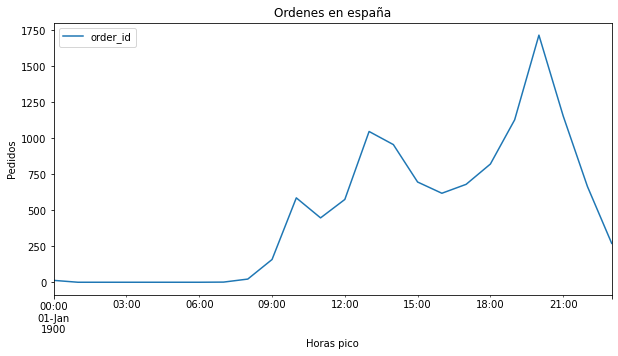

In [19]:
df11.plot(subplots = 'true',figsize=(10, 5))
plt.title('Ordenes en españa')
plt.ylabel('Pedidos')
plt.xlabel('Horas pico')

<h3>----------------------------------------------------------------------------------------------------------------------</h3>

<h3>3. ¿Cuál es el precio medio por pedido en la tienda con ID 12513?</h3>

In [20]:
df[df.store_address == 12513].agg({'products_total':'mean'})

products_total    17.392245
dtype: float64

<h3>----------------------------------------------------------------------------------------------------------------------</h3>

In [21]:
df4 = df[df.country_code == 'ES'].groupby(pd.Grouper(key='new_time', freq='480min')).agg({'order_id':'count'}).sort_values(['new_time'],ascending=False)

In [22]:
df4['order_id'] = (df4['order_id']/11554)*100

In [23]:
df4.head()

,order_id
new_time,
1900-01-01 16:00:00,61.043794
1900-01-01 08:00:00,38.835035
1900-01-01 00:00:00,0.121170


<h3>4. Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8horas.</h3>

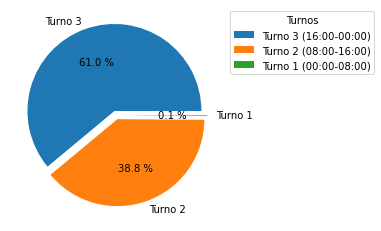

In [24]:
#x_values = df4['new_time'] #['00:00:00','08:00:00','16:00:00']
y_values = df4['order_id']
fig, ax = plt.subplots()
#ax.pie(y_values,labels('sd','das','das'))
turnos = ["Turno 3","Turno 2","Turno 1"]
turnos2 = ["Turno 3 (16:00-00:00)","Turno 2 (08:00-16:00)","Turno 1 (00:00-08:00)"]
desface = (0.05,0.05,0.05)
plt.pie(df4['order_id'],labels = turnos,autopct = "%0.1f %%",explode=desface )
ax.legend( turnos2,
          title="Turnos",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

<h3>----------------------------------------------------------------------------------------------------------------------</h3>

In [25]:
test_X = pd.read_csv(r"C:\Users\mota1\Documents\machine lerning projects\reto-hackthon-JOBMadrid22\test_X.csv", delimiter = ";")

In [26]:
test_X.isnull().sum()

order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
dtype: int64

In [27]:
test_X

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,32233784,17:50:09,MA,68169,PAID,1,61.63
1,32240990,18:38:08,ES,8220,PAID,11,15.99
2,33331821,22:11:59,IT,11169,PAID,4,5.89
3,33200505,22:13:55,AR,33371,PAID,3,7.85
4,32527480,12:01:04,TR,33958,PAID,2,4.75
5,32054504,11:15:39,EC,51386,PAID,2,14.28
6,33447533,18:18:18,ES,16351,PAID,5,14.35
7,32238371,20:21:09,TR,49659,PAID,2,4.42
8,32960491,18:56:17,MA,32273,NOT_PAID,2,1.79
9,32430153,13:43:26,PA,17782,PAID,5,29.89


<h3>5. Realiza un modelo predictivo de machine learning a partir del dataset 'train.csv' en el cual a partir de las variables predictoras que se entregan en el dataset 'test_X' se pueda predecir si el pedido se cancelará o no (columna 'final_status').</h3>

<h4>Preprocesado</h4>

In [28]:
dataset

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,new_time
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,1900-01-01 14:11:09
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,1900-01-01 11:47:41
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,1900-01-01 11:53:53
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,1900-01-01 20:15:21
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,1900-01-01 21:32:16
...,...,...,...,...,...,...,...,...,...
54325,33443728,13:54:33,AR,63825,PAID,2,10.39,DeliveredStatus,1900-01-01 13:54:33
54326,33499561,17:16:09,AR,27741,PAID,1,9.07,DeliveredStatus,1900-01-01 17:16:09
54327,32895248,20:14:59,PA,65895,PAID,2,1.65,DeliveredStatus,1900-01-01 20:14:59
54328,32792276,13:24:05,ES,20134,PAID,6,8.04,DeliveredStatus,1900-01-01 13:24:05


In [29]:
X = dataset.iloc[:, 3:7].values 
y = dataset.iloc[:, 7].values 
y

array(['DeliveredStatus', 'DeliveredStatus', 'DeliveredStatus', ...,
       'DeliveredStatus', 'DeliveredStatus', 'DeliveredStatus'],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [31]:
X

array([[55379, 2, 2, 11.88],
       [23487, 2, 2, 5.2],
       [62229, 2, 1, 6.03],
       ...,
       [65895, 2, 2, 1.65],
       [20134, 2, 6, 8.04],
       [46853, 2, 2, 12.01]], dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h4>Modelado</h4>

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
y_pred  = xgb.predict(X_test)

<h4>Matriz confucion</h4>

In [35]:
from sklearn.metrics import confusion_matrix
cmxgb = confusion_matrix(y_test, y_pred)
cmxgb

array([[   30,  1434],
       [   33, 12086]], dtype=int64)

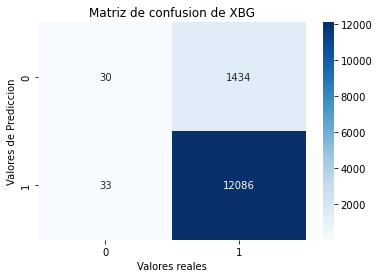

In [36]:
import seaborn as sns
new_cmxgb = pd.DataFrame(cmxgb )
sns.heatmap(new_cmxgb,cmap= 'Blues', annot = True, fmt='')
plt.xlabel("Valores reales")
plt.ylabel("Valores de Prediccion")
plt.title('Matriz de confusion de XBG')
plt.show()

In [37]:
print ("xgboost Training score:",xgb.score(X_train,y_train),"Test Score:", xgb.score(X_test,y_test))

xgboost Training score: 0.8983238029793604 Test Score: 0.8919973496282118


In [38]:
X_test2 = test_X.iloc[:, 3:7].values 

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

labelencoder_X_1 = LabelEncoder()
X_test2[:, 1] = labelencoder_X_1.fit_transform(X_test2[:, 1])


In [42]:
y_pred2  = xgb.predict(X_test2)

In [43]:
y_pred2

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

In [52]:
y_pred2.tofile('predicion.csv',sep=',\n')